In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import jdatetime 
import plotly.express as px
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("../../Divar.csv")

<div <div dir="rtl" align="right">

 #### 1. توزیع آگهی‌های موجود در دسته‌های مختلف را برای دسته‌بندی سطح دو و سطح سه رسم کنید.
</div>

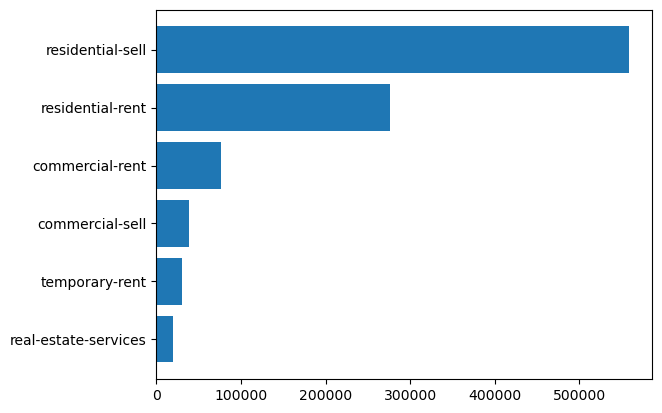

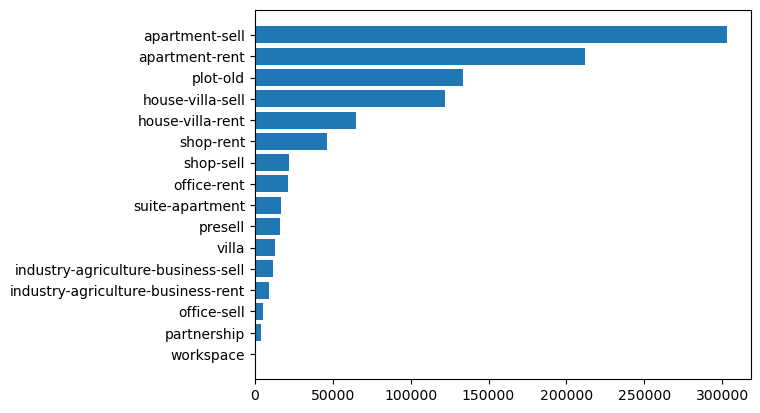

In [ ]:
cat2_counts = df['cat2_slug'].value_counts(ascending = True)

plt.barh(cat2_counts.index , cat2_counts.values)
plt.show()

cat3_counts = df['cat3_slug'].value_counts(ascending = True)
plt.barh(cat3_counts.index , cat3_counts.values)
plt.show()

<div <div dir="rtl" align="right">

### تحلیل توزیع دسته‌بندی‌ها

* بازار املاک عمدتاً توسط **ملک‌های مسکونی** شکل گرفته است و بیشترین تعداد آگهی‌ها مربوط به آپارتمان‌ها می‌باشد.
* **فعالیت فروش بیش از اجاره** در هر دو دسته آپارتمان‌ها و خانه‌ها/ویلاها است.
* **آگهی‌های فروش ملک‌های تجاری کمتر از اجاره‌های آن‌ها** است؛ به‌طور مثال، تعداد آگهی‌های فروش دفتر کاری تقریبا یک‌چهارم آگهی‌های اجاره آن می‌باشد.
* **زمین/قطعه و فضاهای تجاری** بخش کوچکتر ولی قابل توجهی از آگهی‌ها را تشکیل می‌دهند.
* **دسته‌های کم‌تعداد و پراکنده** وجود دارد (مثل workspace و partnership) که ممکن است در مدلسازی نیاز به تجمیع داشته باشند.


    * “آپارتما‌ن‌ها حدود ~۶۱٪ از کل آگهی‌های مسکونی را تشکیل می‌دهند.”
    * “اجاره‌های موقت تنها ~۳٪ از کل بازار را شامل می‌شوند.”

</div>

<div dir="rtl" align="right">

#### 4.توزیع قیمت فروش‌(price_value) را برای دسته‌بندی‌های سطح سه در یک نمودار رسم کنید.

</div>

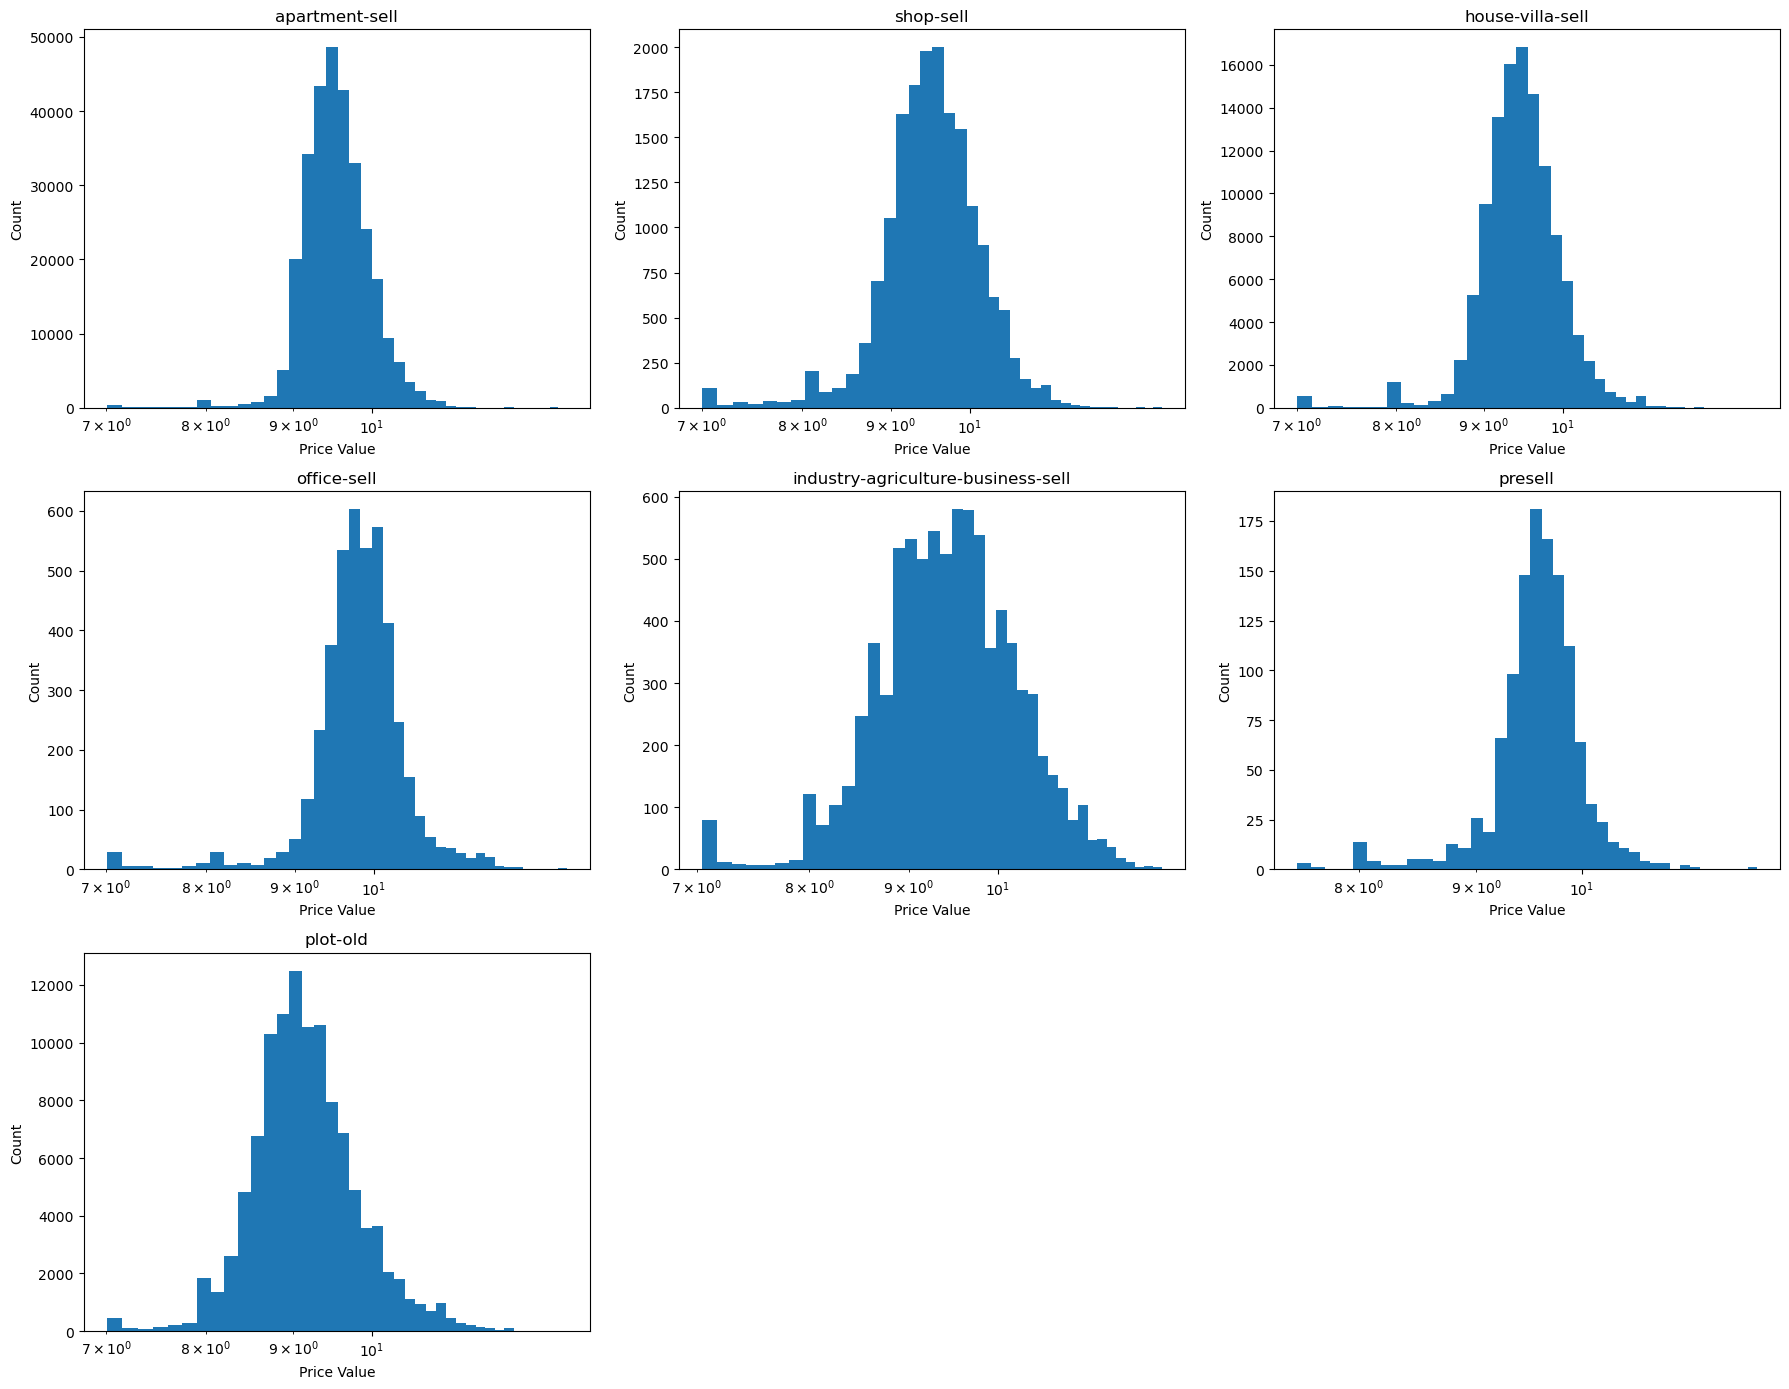

In [ ]:
cat3_columns = list(df["cat3_slug"].dropna().unique())
cat3_list = []

for col in cat3_columns:
    if "sell" in col:
        cat3_list.append(col)

cat3_list.append("plot-old")

df_hist = df[df["price_value"].notna()]

df_test = df_hist[df_hist["price_value"] > 10000000] #Zir 1 million toman melk be forush nemiresad
df_test = df_test[df_test["price_value"] < 1e+13] # Va balae 1 trilion ham nist

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 14))
axes = axes.flatten()


for i, cat in enumerate(cat3_list):
    data = df_test[df_test["cat3_slug"] == cat]["price_value"]
    
    axes[i].hist(np.log10(data), bins=40)
    axes[i].set_xscale('log')
    axes[i].set_title(cat)
    axes[i].set_xlabel("Price Value")
    axes[i].set_ylabel("Count")
    axes[i].set_xlim(None)


for j in range(len(cat3_list), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


بازار آگهی‌های فروش ملک در ایران عمدتاً در بازه‌ی ۱ تا ۱۰ میلیارد تومان متمرکز است، اما در برخی دسته‌ها (به‌ویژه املاک تجاری و صنعتی) تعداد کمی آگهی با قیمت‌های بسیار بالا وجود دارد که باعث چولگی شدید توزیع می‌شود. استفاده از مقیاس لگاریتمی برای تحلیل این داده‌ها کاملاً ضروری و مناسب است.

به دلیل چولگی شدید داده‌های قیمتی، تعداد زیادی نقاط پرت در نمودار مشاهده می‌شود.

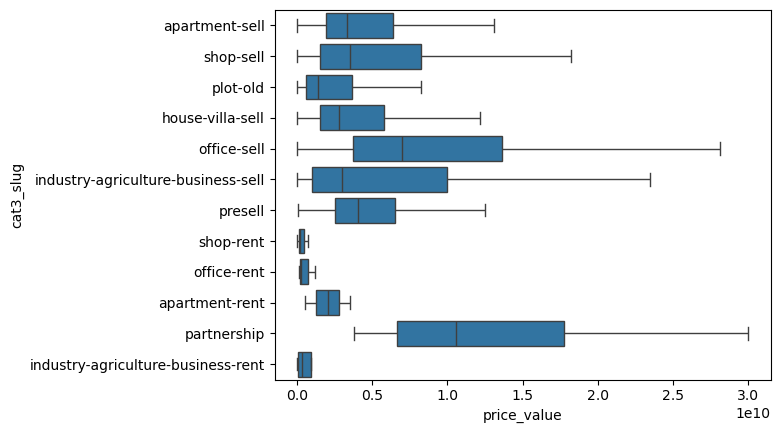

In [ ]:
sns.boxplot(df_test, x="price_value", y ="cat3_slug", showfliers=False)
plt.show()

با حذف این نقاط پرت به این شکل که مطلوب تر است میرسیم که به شکل بهتری به ما توزیع را نشان میدهد اما خیلی از املاک لوکس در نظر گرفته نشده


<div dir="rtl" align="right">

#### 5.بر روی نقشه‌ی جغرافیایی heatmap آگهی‌های هر منطقه را رسم کنید. تراکم آگهی‌ها کدام منطقه بیشتر است؟
</div>

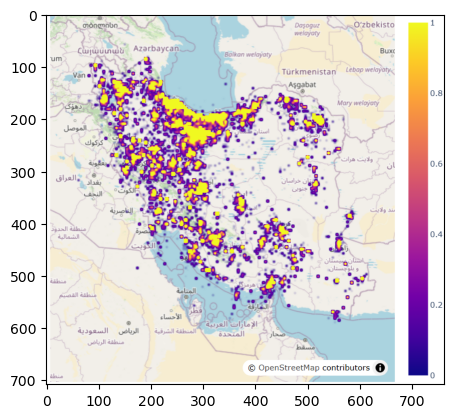

In [ ]:
# import plotly.express as px
# fig = px.density_map(df, lat='location_latitude', lon='location_longitude', radius=1,
#                         center=dict(lat=32, lon=53), zoom=4, height=700, width= 700,
#                         map_style="open-street-map")
# fig.show()
from PIL import Image
img = np.asarray(Image.open('fig/image.png'))
imgplot = plt.imshow(img)
#The density map was too heavy, so it has been replaced with an image for your convenience. Please run the code above if needed.

<div <div dir="rtl" align="right">


### تحلیل نقشهٔ حرارتی آگهی‌ها

* بیشترین تراکم آگهی‌ها در **شمال ایران** مشاهده می‌شود، به‌ویژه مناطق تهران، البرز، گیلان و رشت.
* همچنین **کلان‌شهرها** دیگر نیز تراکم قابل توجهی دارند، اما کمتر از مناطق شمالی هستند.
* مناطق **جنوب و شرق ایران** دارای تراکم کمتری از آگهی‌ها هستند که نشان‌دهنده‌ی بازار کوچک‌تر یا تعداد کمتر آگهی‌ها در این مناطق است.
* تعداد بسیار کمی از آگهی‌ها در **کشورهای همسایه** مانند عراق، عربستان سعودی، سوریه و حتی ترکیه ثبت شده‌اند. این آگهی‌ها خیلی کم هستند و می‌توان آن‌ها را برای تحلیل بازار داخلی ایران نادیده گرفت.
* این تحلیل نشان می‌دهد که بازار املاک ایران عمدتاً حول **مناطق شهری و شمالی کشور** متمرکز است و برای هرگونه تحلیل یا مدلسازی تراکم، تمرکز بر این مناطق منطقی است.

</div>


7. در طول زمان قیمت‌های اسمی افزایش پیدا می‌کنند اما این افزایش لزوما به معنی بالارفتن ارزش واقعی ملک نیست و می‌تواند ناشی از تورم باشد. به ازای میانگین مبلغ قیمت در سال‌های ۱۴۰۰ تا ۱۴۰۳ قیمت حقیقی را محاسبه کنید و بررسی کنید ترند قیمت حقیقی چگونه است. 


In [ ]:
import pandas as pd
df_divar = pd.read_csv("C:\Users\Memari\Downloads\Divar.csv")

<div dir="rtl" align="right">

## 6.ترند میانگین قیمت اجاره بر حسب ماه‌های قرار گرفتن آگهی‌ها رسم کنید 

</div>

In [10]:
Divar_df = pd.read_csv("F:\Backup\Drive E\Quera\Project_1_ML\Divar.csv")
Divar_df['created_at_month'] = pd.to_datetime(Divar_df['created_at_month'])

Divar_df['created_at_jalali'] = Divar_df['created_at_month'].apply(
    lambda x: jdatetime.date.fromgregorian(date=x.date())
)
Divar_df['jalali_month'] = Divar_df['created_at_jalali'].apply(lambda x: x.month)
Divar_df['jalali_year'] = Divar_df['created_at_jalali'].apply(lambda x: x.year)

C:\Users\parisa.raoofi\AppData\Local\Temp\ipykernel_6048\3233500554.py:1: DtypeWarning: Columns (11,27,29,53) have mixed types. Specify dtype option on import or set low_memory=False.
  Divar_df = pd.read_csv("F:\Backup\Drive E\Quera\Project_1_ML\Divar.csv")


In [ ]:
df_6 = Divar_df[['cat2_slug', 'jalali_year','jalali_month', 
                 'rent_value','credit_value' 
                #  ,'rent_price_on_regular_days','rent_price_on_special_days','rent_price_at_weekends'
                 ]]

df_6.drop(df_6[df_6['cat2_slug'].isin(['real-estate-services' , 'residential-sell', 'commercial-sell','temporary-rent'])].index, axis=0, inplace=True)


df_6 = df_6[df_6['jalali_year'] == 1403]
df_6 = df_6[
    ~(
    # (df_6['cat2_slug'] != 'temporary-rent') &
    (df_6['credit_value'].isna()) & 
    (df_6['rent_value'].isna())
    )
]

df_6['rent_credit'] = df_6['credit_value'] * 0.03
df_6['price_total'] = df_6['rent_value']  + df_6['rent_credit'] 

low = df_6['price_total'].quantile(0.01)
high = df_6['price_total'].quantile(0.99)

df_6 = df_6[
    (df_6['price_total'] >= low) &
    (df_6['price_total'] <= high)
]


df_6_count = df_6.groupby(['cat2_slug','jalali_month']).agg(
    count_rent_credit = ('price_total', 'count'), 
    ).reset_index()

df_6_count.sample()

C:\Users\parisa.raoofi\AppData\Local\Temp\ipykernel_6048\3279743222.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_6.drop(df_6[df_6['cat2_slug'].isin(['real-estate-services' , 'residential-sell', 'commercial-sell','temporary-rent'])].index, axis=0, inplace=True)


,cat2_slug,jalali_year,jalali_month,rent_value,credit_value
864769,residential-rent,1403,2,100000.0,530000000.0


In [18]:
fig = px.line(
    df_6,
    x="jalali_month",
    y="mean_rent_credit",
    color="cat2_slug",
    markers=True,
    labels={
        "jalali_month": "Jalali Month",
        "mean_rent_credit": "Average Price",
        "cat2_slug": "Category"
    },
    title="Average Monthly Price for Residential vs Commercial"
)

fig.update_traces(
    mode="lines+markers+text",
    text=df_6["mean_rent_credit"].apply(lambda x: f"{x/1e6:.1f}M"),  # ✅ تبدیل به میلیون
    textposition="top center",
    textfont_size=12
)

fig.update_xaxes(tickmode="linear", tick0=1, dtick=1)

fig.update_layout(
    width=900,
    height=450,
    legend_title_text="Property Type",
    template="plotly_white"
)

fig.show()


In [19]:
fig = px.line(
    df_6_count,
    x='jalali_month',
    y='count_rent_credit',
    color='cat2_slug',
    markers=True,
    labels={
        'jalali_month': 'Jalali Month',
        'count_rent_credit': 'Count',
        'cat2_slug': 'Category'
    },
    title='Monthly Count for Residential vs Commercial'
)

# ✅ نمایش عدد کوتاه شده (K)
fig.update_traces(
    mode="lines+markers+text",
    text=df_6_count['count_rent_credit'].apply(lambda x: f"{x/1000:.1f}K" if x >= 1000 else str(x)),
    textposition="top center",
    textfont_size=12
)

fig.update_xaxes(
    tickmode='linear',
    tick0=1,
    dtick=1
)

fig.update_layout(
    width=900,
    height=450,
    legend_title_text='Property Type',
    template='plotly_white'
)

fig.show()


<div dir="rtl" style="font-size:18px; font-family: Vazirmatn, Arial; line-height: 1.9;">

روند کلی قیمت‌ها صعودی و مطابق انتظارِ تورم ایران است؛ جهش‌ها بیشتر انعکاس شرایط اقتصادی‌اند.

دراپ‌های ماه ۱ و مخصوصاً ۱۰ و ۱۱ به‌خاطر کم بودن تعداد آگهی‌ها (sample size پایین) رخ داده و میانگین‌ها در این ماه‌ها ناپایدار و قابل اتکا نیستند.

</div>

<div dir="rtl" align="right">

## 8. ماتریس هم‌بستگی را برای مبلغ قیمت، متراژ زمین، زیربنا، ظرفیت نفرات، تعداد اتاق‌ها و طول و عرض جغرافیایی رسم نمایید.

</div>

In [21]:
Divar_df['rooms_count'].replace({ "بدون اتاق":0, "یک":11, "دو":2, "سه":3, "چهار":4, "پنج یا بیشتر":5}, inplace=True)

base_cols = [ 'land_size', 'building_size', 'rooms_count', 'location_latitude', 'location_longitude']

C:\Users\parisa.raoofi\AppData\Local\Temp\ipykernel_6048\400331270.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



C:\Users\parisa.raoofi\AppData\Local\Temp\ipykernel_6048\400331270.py:1: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



In [22]:
scaler = StandardScaler()

In [23]:
# --- SELL (matrix + price inside) ---
df_sell = Divar_df[
    Divar_df['cat2_slug'] == 'residential-sell'
][base_cols + ['price_value', 'jalali_year']].dropna()

df_sell = df_sell[df_sell['jalali_year'] == 1403].copy()
df_sell.drop(columns=['jalali_year'], inplace=True)

# price per meter
df_sell['price_per_meter'] = df_sell['price_value'] / df_sell['building_size']

# remove outliers on price_per_meter
q_low, q_high = df_sell['price_per_meter'].quantile([0.02, 0.98])
df_sell = df_sell[
    (df_sell['price_per_meter'] >= q_low) &
    (df_sell['price_per_meter'] <= q_high)
].copy()

# ✅ correlation matrix includes ALL features + price
cols_for_corr_sell = base_cols + ['price_per_meter']
corr_sell = df_sell[cols_for_corr_sell].corr(method='spearman')


In [24]:
df_rent = Divar_df[
    Divar_df['cat2_slug'].isin(['residential-rent', 'commercial-rent'])
][base_cols + ['rent_value', 'credit_value', 'jalali_year']].copy()

df_rent = df_rent.dropna(subset=['rent_value', 'credit_value'], how='all')

df_rent['price_total'] = (
    df_rent['rent_value'].fillna(0) +
    df_rent['credit_value'].fillna(0) * 0.03
)

df_rent = df_rent[df_rent['jalali_year'] == 1403]
df_rent.drop(columns=['jalali_year'], inplace=True)

# ویژگی مهم: قیمت هر متر
df_rent['price_per_meter'] = df_rent['price_total'] / df_rent['building_size']
# حذف outlier
q_low, q_high = df_rent['price_per_meter'].quantile([0.02, 0.98])

df_rent = df_rent[(df_rent['price_per_meter'] >= q_low) & (df_rent['price_per_meter'] <= q_high)]


df_rent = df_rent[
    (df_rent['price_total'] >= low) &
    (df_rent['price_total'] <= high)
]

df_rent = df_rent[base_cols + ['price_total']].dropna()
# df_rent['location_radius'] = (
#     df_rent['location_latitude']**2 +
#     df_rent['location_longitude']**2
# )
# اسکیل
df_rent_scaled = pd.DataFrame(
    scaler.fit_transform(df_rent),
    columns=df_rent.columns
)

corr_rent = df_rent_scaled.corr( method='spearman')

In [25]:
df_temp = Divar_df[
    Divar_df['cat2_slug'] == 'temporary-rent'
][
    base_cols + [
        'rent_price_on_regular_days',
        'rent_price_at_weekends',
        'rent_price_on_special_days'
    ]
].copy()

df_temp['price_total'] = (
    df_temp['rent_price_on_regular_days']
    .fillna(df_temp['rent_price_at_weekends'])
    .fillna(df_temp['rent_price_on_special_days'])
)

df_temp = df_temp[base_cols + ['price_total']]
# df_temp = df_temp[base_cols + ['price_total']].dropna()
# اسکیل
df_temp_scaled = pd.DataFrame(
    scaler.fit_transform(df_temp),
    columns=df_temp.columns
)

corr_temp = df_temp_scaled.corr( method='spearman')

c:\Users\parisa.raoofi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\extmath.py:1144: RuntimeWarning:

invalid value encountered in divide

c:\Users\parisa.raoofi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\extmath.py:1149: RuntimeWarning:

invalid value encountered in divide

c:\Users\parisa.raoofi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\extmath.py:1169: RuntimeWarning:

invalid value encountered in divide



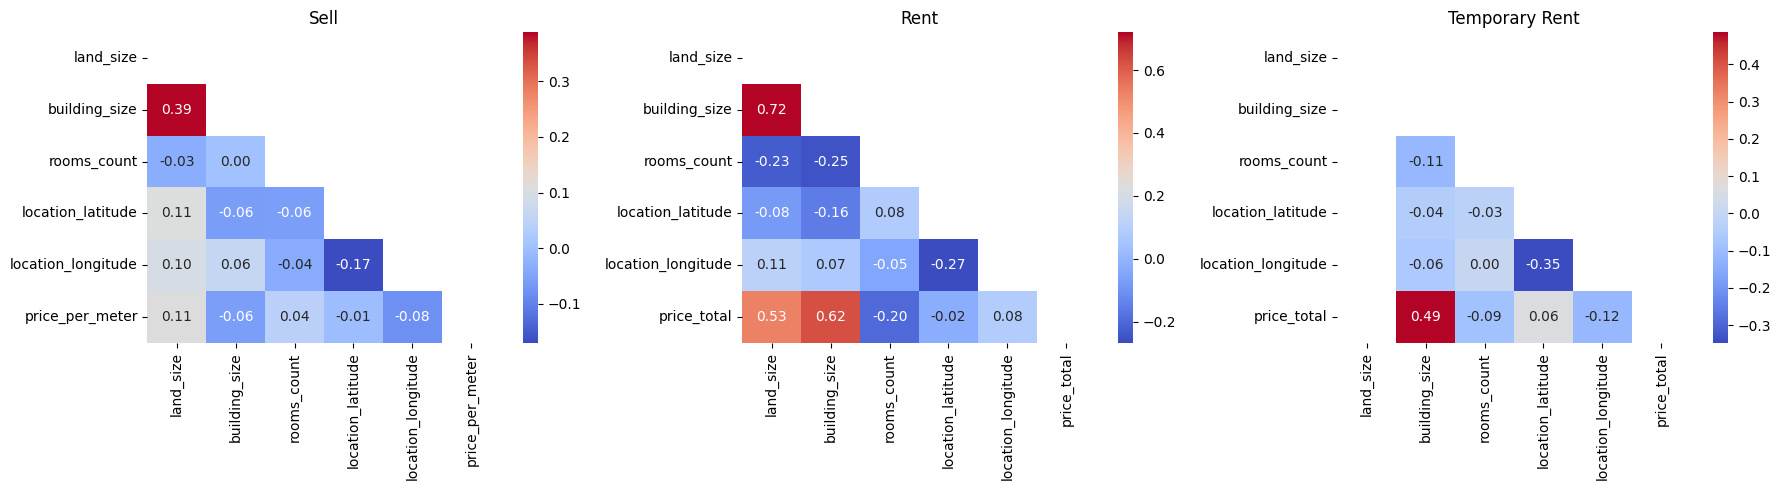

In [26]:
mask = np.triu(np.ones_like(corr_sell, dtype=bool))


fig, axes = plt.subplots(1, 3, figsize=(18,5))

mask_sell = np.triu(np.ones_like(corr_sell, dtype=bool))
mask_rent = np.triu(np.ones_like(corr_rent, dtype=bool))
mask_temp = np.triu(np.ones_like(corr_temp, dtype=bool))

sns.heatmap(corr_sell, annot=True, fmt='.2f', cmap='coolwarm',
            mask=mask_sell, ax=axes[0])
axes[0].set_title('Sell')

sns.heatmap(corr_rent, annot=True, fmt='.2f', cmap='coolwarm',
            mask=mask_rent, ax=axes[1])
axes[1].set_title('Rent')

sns.heatmap(corr_temp, annot=True, fmt='.2f', cmap='coolwarm',
            mask=mask_temp, ax=axes[2])
axes[2].set_title('Temporary Rent')

plt.tight_layout()
plt.show()

<div dir="rtl" style="font-family: Vazirmatn, Arial; line-height: 1.9; font-size:14px;">
📌 تحلیل همبستگی‌ها (Sell / Rent / Temporary Rent)

Rent قوی‌ترین رابطه را با متراژ دارد: building_size با قیمت کل همبستگی بالا دارد (0.62) و land_size هم اثرگذار است (0.53)؛ یعنی در اجاره، بزرگ‌تر بودن ملک مستقیم‌تر قیمت را بالا می‌برد.

Sell روابط کلی ضعیف‌ترند و price_per_meter تقریباً با بقیه ویژگی‌ها همبستگی معنی‌دار ندارد؛ یعنی قیمت فروش بیشتر به موقعیت و عوامل کیفی وابسته است تا فقط اندازه.

Temporary Rent همبستگی‌ها متوسط‌اند (مثلاً building_size با price_total حدود 0.49) و مختصات جغرافیایی اثر منفی ملایم دارند (مثل longitude ≈ -0.35) که می‌تواند نشان‌دهنده‌ی تفاوت قیمت در نواحی شهر باشد.

🗺️ درباره lat / lon (تراکم آگهی)

بر اساس مختصات location_latitude و location_longitude، تراکم آگهی‌ها بیشتر در شمال‌شرق شهر دیده می‌شود؛ یعنی نقاط بیشتری در آن محدوده ثبت شده‌اند (احتمالاً به دلیل تقاضا/عرضه بالاتر یا پوشش داده بهتر در آن منطقه).

</div>